# Markov Chains and Random Walks

Combined material from here: 

https://www.cs.princeton.edu/courses/archive/fall13/cos521/lecnotes/lec12.pdf

and here

https://resources.mpi-inf.mpg.de/departments/d1/teaching/ws11/SGT/Lecture5.pdf

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
import laUtilities as ut
import seaborn as sns
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [3]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

**Example**: There is a sequence of $2n + 1$ pubs on a street. A
drunkard starts at the middle house. At every time step, if he is at pub number $i$, then
with probability $1/2$ he goes to pub number $i − 1$ and with probability $1/2$ to pub $i + 1$.
How many time steps does it take him to reach either the first or the last pub?

**Example**: Suppose the drunkard does his random walk in a city that’s designed like a grid. At each step he goes North/South/East/West by one block with probability $1/4$. How many steps does it take him to get to his intended address, which is $n$ blocks away?

**Problem**: We can consider a random walk on a $d$-regular graph $G = (V, E)$ instead of in physical space. The particle starts at some vertex $v_0$ and ateach step, if it is at a vertex $u$, it picks a random edge of $u$ with probability $1/d$ and then moves to the other vertex in that edge. 

There is also a lazy version of this walk where he
stays at u with probability $1/2$ and moves to a random neighbor with probability $1/2d$.


Thus the drunkard’s walk can be viewed as a random walk on a line graph.

* One can similarly consider random walks on directed graph (randomly pick an outgoing edge out of u to leave from) and walks on weighted graph (pick an edge with probability proportional to its weight). 

* Walks on directed weighted graphs are called markov chains. In a random walk, the next step does not depend upon the previous history of steps, only on the current position/state of the moving particle. 

* In general, the term markovian refers to systems with a “memoryless”property. 

**Definition**: A sequence of random variables $X_0, X_1, \ldots\subseteq\Omega$ is a Markov chain with state
space $\Omega$ if for all possible states $x_{t+1}, x_t,\ldots , x_1\subseteq \Omega$
we have:

$$
\text{Pr} [ X_{t+1} = x_{t+1} | X_t = x_t \wedge X_{t−1} = x_{t−1} \wedge · · · \wedge X_ = x_0 ] = \text{Pr} [ X_{t+1} = x_{t+1} | X_t = x_t].
$$

The Markov chain is called time-homogenous if the latter probability is independent of $t$.

Here, we will only consider finite Markov chains which are also time-homogenous.

In this case, it is convenient to store all information about the transition in a Markov chain in
the so-called *transition matrix* $M$ which is an $n\times n$ (if $|\Omega|=n$) matrix defined by:

$$
M(x,y) := \text{Pr} [ X_1 = y | X_0 = x ].
$$

For the random walk on the line we can have the following transition matrix

$(2n+1)\times (2n+1)$

$M(i,i)=0$ for $i\neq 1$ and $i\neq (2n+1)$

$M(i,i+1)=1/2$ for every $i<(2n+1)$

$M(i,i-1)=1/2$ for every $i>1$

$M(1,1)=1/2$

$M(2n+1,2n+1)=1/2$

**Is this a Markov Chain?**: Suppose that there is a coin purse containing five quarters (each worth 25¢), five dimes (each worth 10¢), and five nickels (each worth 5¢), and one by one, coins are randomly drawn from the purse and are set on a table. If $X_{n}$ represents the total value of the coins set on the table after n draws, with $X_{0}=0$, then is the sequence $\{X_{n}:n\in \mathbb {N} \}$ a Markov chain?

### Properties of the transition matrix 


* Therefore, each row in the matrix $M$ is a distribution, implying that $M(i,j)\geq 0$ for every $i, j \in \Omega$ and
$$\sum_j M(i,j) = 1.$$

### Markov chains and random walks

A very important special case is the Markov chain that corresponds to a random walk on
an *undirected*, *unweighted* graph. Here, the random walk picks each step a neighbor chosen
uniformly at random and moves to that neighbor. Hence, the transition matrix is: 

$$M = D^{−1}\cdot A,$$

where $D$ is the diagonal matrix with $D(i,i) =\text{deg}(i)$.


### Multiple steps of a markov chain

**Lemma**: For any two states $x, y \in\Omega$, and any round $t$:

$$\text{Pr} [ X_t = y | X_0 = x ] = M^t(x,y).$$


**Proof**: Let $\mathbf{v}^0$
be the (row-)unit-vector which has $1$ at component $x$ and $0$ otherwise (the starting
distribution). Then let $\mathbf{v}^t$ be the distribution of the random walk at step $t$. Clearly,

$$
\mathbf{v}^1(y) = \sum_{z\in\Omega}M(z,y)=1\cdot M(x,y).
$$

Therefore,

$$
\mathbf{v}^1=\mathbf{v}^0M.
$$

More generally:

$$
\mathbf{v}^t = \mathbf{v}^{t-1}M = \mathbf{v}^0M^{t}.
$$

$$
\mathbf{v}^t = \mathbf{v}^{t-1}M = \mathbf{v}^{t-2}MM=\ldots=\mathbf{v}^0M^{t}.
$$

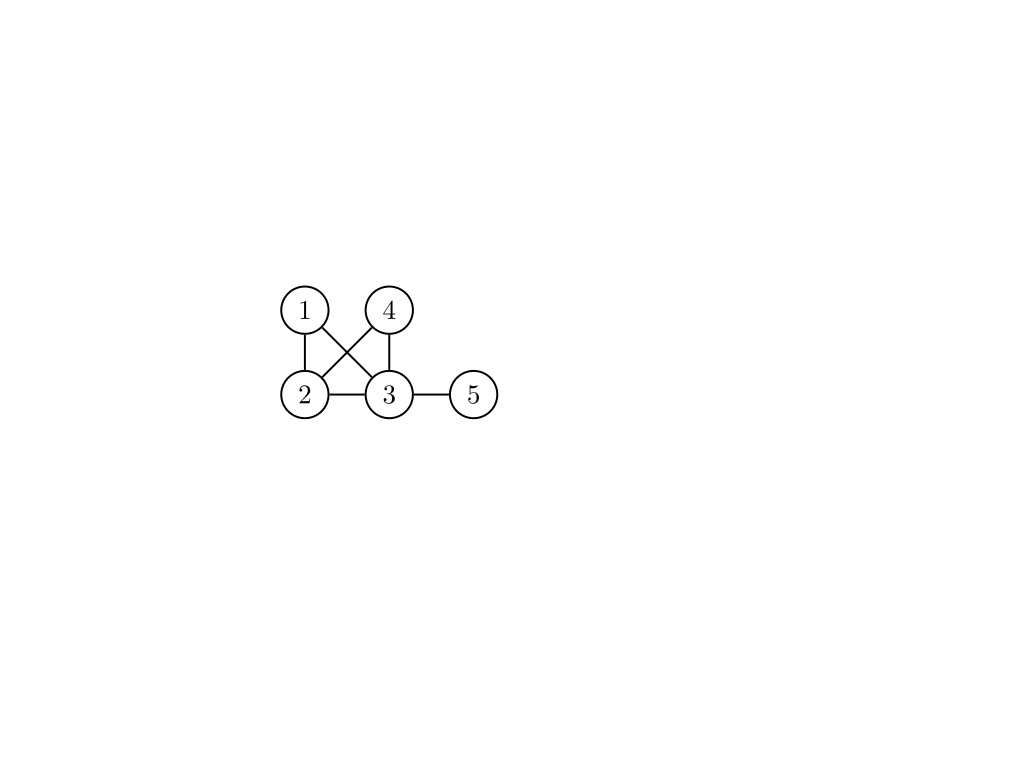

In [4]:
sl.hide_code_in_slideshow()
display(Image("figs/mc.jpeg", height=500, width=500))

In [5]:
M1 = np.array([0, 1/2, 1/2, 0, 0])
M2 = np.array([1/3, 0, 1/3, 1/3, 0])
M3 = np.array([1/4, 1/4, 0, 1/4, 1/4])
M4 = np.array([0, 1/2, 1/2, 0, 0])
M5 = np.array([0, 0, 0, 1, 0])

M = np.array([M1,M2,M3,M4,M5])
print(M)

[[0.         0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.25       0.25       0.         0.25       0.25      ]
 [0.         0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.         0.        ]]


In [6]:
v_0= [0, 0, 0, 1, 0]

v_1 = [0, 0.5, 0.5, 0, 0]

v_2 = [0.5*1/3+0.5*0.25,0.5*0.25, 0.5*1/3+0.5*0.25, 0.5*1/3, 0.5*0.25]

In [7]:
M10 = np.linalg.matrix_power(M,10)
print(M10)

[[0.15837995 0.2626712  0.28037793 0.22823431 0.07033661]
 [0.15690908 0.26413805 0.28135449 0.22775206 0.06984632]
 [0.15839402 0.26266517 0.28037391 0.22822426 0.07034264]
 [0.15837995 0.2626712  0.28037793 0.22823431 0.07033661]
 [0.15692515 0.26413002 0.28134645 0.22774402 0.06985436]]


In [9]:
M10x = np.linalg.matrix_power(M,500)
print(M10x)

[[0.15789474 0.26315789 0.28070175 0.22807018 0.07017544]
 [0.15789474 0.26315789 0.28070175 0.22807018 0.07017544]
 [0.15789474 0.26315789 0.28070175 0.22807018 0.07017544]
 [0.15789474 0.26315789 0.28070175 0.22807018 0.07017544]
 [0.15789474 0.26315789 0.28070175 0.22807018 0.07017544]]


Starting point doeas not matter!

Because $M(i,j)=M(i',j)$ for **every** pair $(i,i')$

In [15]:
M1 = np.array([1/2, 1/2, 0, 0, 0])
M2 = np.array([0, 1, 0, 0, 0])
M3 = np.array([0, 0, 1/2, 1/2, 0])
M4 = np.array([0, 0, 0, 1/2, 1/2])
M5 = np.array([0, 0, 0, 0, 1])

M = np.array([M1,M2,M3,M4,M5])
print(M)

[[0.5 0.5 0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  1. ]]


In [16]:
M10x = np.linalg.matrix_power(M,10000)
print(M10x)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


**Not ALL Markov Chains have a stationary probability distribution!!!**.

### Random walks on edge-weighted graphs

Every (undirected) edge ${x, y} \in E$ has a non-negative weight $w(x,y)$
The
transition matrix $M$ is then defined as:

$$M(x,y) = \frac{w(x,y)}{w_x},
$$

where $w_x=\sum_{z\in N(x)}w(x,z)$.


**Definition**: A  distribution $\pi$ is called stationary, if $\pi M = \pi$.






A distribution $\pi$ is (time)-reversible w.r.t. $M$, if it satisfies for all $x, y \in\Omega$,
$$
\pi(x)M(x,y) = \pi(y)M(y,x).
$$
This is also known as the *detailed-balanced* condition.






**Lemma**: Let $\pi$ be a probability distribution that is time-reversible w.r.t. $M$. Then $\pi$ is a
stationary distribution for $M$.

*Proof* For all states $y\in\Omega$ we have:
$$
\sum_x \pi(x)M(x,y)=\sum_x \pi(y)M(y,x)=\pi(y)
$$


### Examples

**Example 1** What is the stationary distribution of a random walk on an unweighted and undirected graph?

**Example 2** What is the stationary distribution of a transition matrix $M$ that is symmetric (and ergodic)?

**Example 3** What is the stationary distribution of a random walk on an connected undirected weighted graph?

**Solution to Example 1:** $\pi(i)$ is proportional to the degree of node $i$. This means:

$\pi(i)=\frac{\text{deg}(i)}{\sum_{j}\text{deg}(j)}$

If the graph $G=(V,E)$, then $\sum_{j}\text{deg}(j) = 2|E|$.

Then $\pi(i)=\frac{\text{deg}(i)}{\sum_{j}\text{deg}(j)} = \frac{\text{deg}(i)}{2|E|}$

**Claim:** $\pi(i)=\frac{\text{deg}(i)}{\sum_{j}\text{deg}(j)}$ is the stationary probability distribution
of a random walk in a connected unweighted and undirected graph.

$\pi = \pi M$, where $M$ is the transition matrix (**stationarity condition**).

$M = D^{-1}A$, $M(i,j)=0$ if edge $(i,j)$ does not exist and $M(i,j)=\frac{1}{\text{deg}(i)}$ if edge $(i,j)$ exists.

So, the only thing we need to do is to show that for the $\pi$ conjectured above and for this particular $M$ the stationarity condition is true.


$\pi$ is $1\times n$ and $M$ is $n\times n$ so $\pi M$ is of size $1\times n$


Let $\mathbf{v}=\pi M$ and let's look at the $i$-element of $\mathbf{v}$, $\mathbf{v}(i)$. If I show that $\mathbf{v}(i) = \frac{\text{deg}(i)}{2|E|}$ I am done.

$\mathbf{v}(i)=\pi\cdot M^i$, $M^i$ is the $i$-th column of $M$

$\mathbf{v}(i)=\pi\cdot M^i = \sum_{j}\pi(j)M(j,i) = \sum_{j\in N(i)}\frac{\text{deg}(j)}{2|E|}\frac{1}{\text{deg}(j)}$, where $N(i)$ are the neighbors of $i$ in the graph.

But now we have $\sum_{j\in N(i)}\frac{\text{deg}(j)}{2|E|}\frac{1}{\text{deg}(j)}= \sum_{j\in N(i)}\frac{1}{2|E|}=\frac{1}{2|E|}\sum_{j\in N(i)} 1= \frac{\text{deg}(i)}{2|E|}=\pi(i)$

**Start of a Solution for Example 3:**

In this case the stationary probability distribution will again be:

$\pi(i)=\frac{\text{deg}(i)}{\sum_{j}\text{deg}(j)}$

But now, the degree of a node takes into consideration the weights of the edges incident to the node.  That is,

$\text{deg}(i)= \sum_{(i,j)\in E}w(i,j)$

**Start of a Solution for Example 2:**

In this case the stationary probability distribution will be the uniform probability distribution:


$\pi(i)=\frac{1}{n}$, where $n$ is the number of states in the transition matrix.


## Ergodic Markov Chains

**Definition**: A Markov chain is called *aperiodic* if for all states $x\in\Omega$:

$$\text{gcd}(t \in \mathbb{N}: M^t(x,x)>0)=1.$$


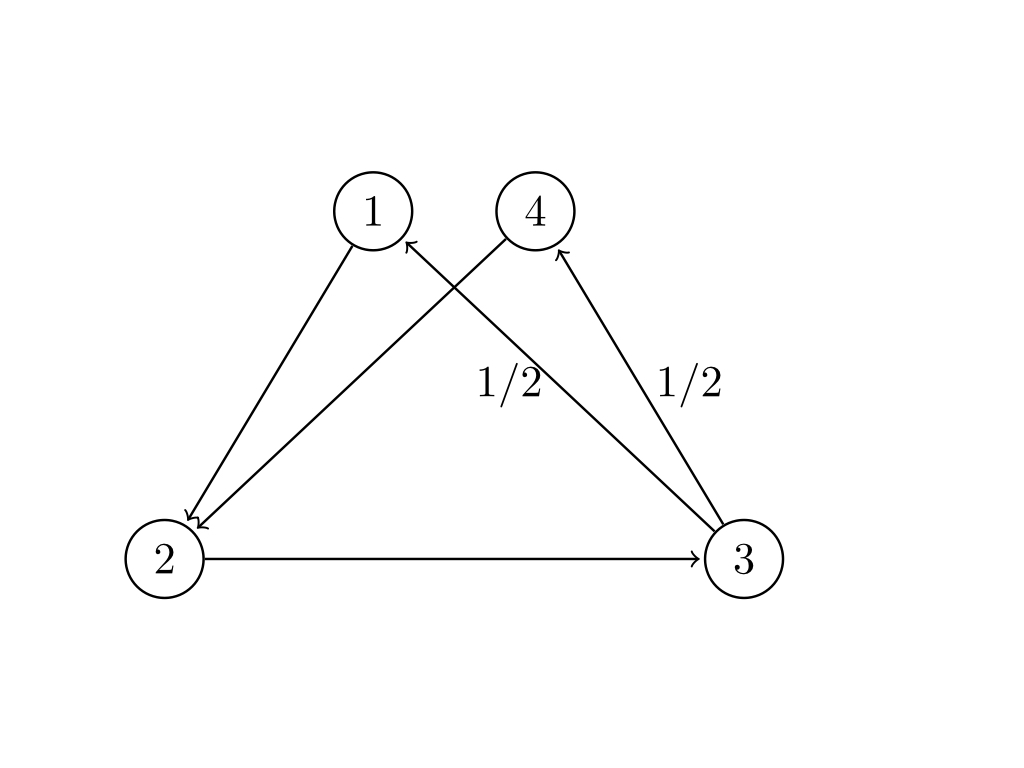

In [52]:
sl.hide_code_in_slideshow()
display(Image("figs/periodic.jpeg", height=500, width=500))

In [21]:
M1 = np.array([0, 1, 0, 0])
M2 = np.array([0, 0, 1, 0])
M3 = np.array([1/2, 0, 0,1/2])
M4 = np.array([0, 1, 0, 0])

M = np.array([M1,M2,M3,M4])
print(M)

[[0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.5 0.  0.  0.5]
 [0.  1.  0.  0. ]]


In [18]:
M2 = np.linalg.matrix_power(M,2)
print(M2)

[[0.  0.  1.  0. ]
 [0.5 0.  0.  0.5]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]]


In [19]:
M3 = np.linalg.matrix_power(M,3)
print(M3)

[[0.5 0.  0.  0.5]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.5 0.  0.  0.5]]


In [20]:
M4 = np.linalg.matrix_power(M,4)
print(M4)

[[0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.5 0.  0.  0.5]
 [0.  1.  0.  0. ]]


#### Bipartite graphs are also periodic (unless you put self loops)

In [28]:
M1 = np.array([1/2, 0, 1/4, 1/4])
M2 = np.array([0, 1/2, 1/4, 1/4])
M3 = np.array([1/4, 1/4, 1/2,0])
M4 = np.array([1/4, 1/4, 0, 1/2])

M = np.array([M1,M2,M3,M4])
print(M)

[[0.5  0.   0.25 0.25]
 [0.   0.5  0.25 0.25]
 [0.25 0.25 0.5  0.  ]
 [0.25 0.25 0.   0.5 ]]


In [29]:
M2 = np.linalg.matrix_power(M,100)
print(M2)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [27]:
M3 = np.linalg.matrix_power(M,101)
print(M3)

[[0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]]


**Definition** A Markov chain is *irreducible* if for any two states $x, y \in\Omega$ there exists an
integer $t$ such that: $M^t(x,y)>0$.
Intuitively, a Markov chain is called irreducible if it is connected viewed as a graph


## Fundamental Theorem

If a MC is connected and aperiodic then, it has a stationary probability distribution

## Fundamental Theorem of Markov Chains

**Theorem**: If a Markov chain is aperiodic and ireducible, then it holds for all states $x, y \in\Omega$:

* there exists an integer $T = T(x, y) \in \mathbb{N}$ so that for all $t > T$, $M^t(x,y)>0$.

* in the limit,

$$\lim_{t\rightarrow\infty}M^t(x,y) = \pi(y) =
\frac{1}
E [ \tau_{y,y} ]
,
$$
where $\tau_{y,y} = \min \{t \in\mathbb{N} \ \{0\}: X_t = y, X_0 = y\}$ is the first return to $y$.
Hence for large $t$, the matrix $M^t$ has value $\pi(y)$ in column $y$. 

Note that
$$\pi(y) =\frac{1}{\tau_{y,y}}
$$ 
means that the proportion of steps spent in state $y$ is equal to the expected waiting times
between two consecutive visits.

**Example**: Consider a Markov chain defined by the following random walk on the nodes of an $n$-cycle. At each step, stay at the same node with probability $1/2$. Go left with probability $1/4$ and right with probability $1/4$.

**Question**: What is the stationary distribution of this random walk?